In [43]:
%pylab inline
from tqdm import tqdm
import pysam
from riboraptor.helpers import is_read_uniq_mapping
from collections import Counter, defaultdict
import pandas as pd
import seaborn as sns
from riboraptor.kmer import fastq_kmer_histogram

Populating the interactive namespace from numpy and matplotlib


In [ ]:
1080340 2265218 3019185 4815042 5716305 6415950 7270597 8450869 9117566 0458061

In [51]:
histogram5 = fastq_kmer_histogram('/staging/as/skchoudh/re-ribo-analysis/hg38/SRP017942/preprocessed/SRR648667_trimmed_trimmed.fq.gz', five_prime=True, kmer_length=range(1, 10))
histogram3 = fastq_kmer_histogram('/staging/as/skchoudh/re-ribo-analysis/hg38/SRP017942/preprocessed/SRR648667_trimmed_trimmed.fq.gz', five_prime=False, kmer_length=range(1, 10))


100%|██████████| 1000000/1000000 [00:18<00:00, 52700.49it/s]


In [63]:
histogram = fastq_kmer_histogram('/staging/as/skchoudh/re-ribo-analysis/hg38/SRP017942/preprocessed_step1/SRR648667_trimmed.fq.gz', five_prime=False, kmer_length=range(5, 30))

100%|██████████| 1000000/1000000 [00:59<00:00, 16742.03it/s]


In [69]:
histogram[11]

AAAAAAAAAAA    32.1171
CTAAAAAAAAA     5.2667
TAAAAAAAAAA     4.5825
CTTAAAAAAAA     2.8384
GCTAAAAAAAA     2.3671
CGTCGCTAAAA     2.0578
TTAAAAAAAAA     1.6912
CGTCGCTTAAA     1.6854
CAAAAAAAAAA     1.5405
GTCGCTAAAAA     1.3245
GTCGCTTAAAA     1.3214
GCTTAAAAAAA     1.0996
GCAAAAAAAAA     0.5718
CGAGGCCAAAA     0.5500
CCAAAAAAAAA     0.5309
TCCCCAAAAAA     0.4070
CGTCGCAAAAA     0.4063
ATAAAAAAAAA     0.3840
GAAAAAAAAAA     0.3737
TCCCCCGAAAA     0.3557
TCCCCCAAAAA     0.3421
GGTCCCCAAAA     0.3348
GTAAAAAAAAA     0.3013
GTCGCAAAAAA     0.2494
GCTGCGGCGGG     0.2296
CTCAAAAAAAA     0.2294
AATAAAAAAAA     0.2236
AAAAAAAATCG     0.2102
GCCAAAAAAAA     0.2082
TCAAAAAAAAA     0.2046
                ...   
GATTTGGGTAA     0.0001
GATTTGGAGGC     0.0001
GATTTGCTAAA     0.0001
GATTTGCCATA     0.0001
GATTTTGTAAA     0.0001
GATTTTTCCAA     0.0001
GCAAACCGAAA     0.0001
GATTTTTGAAA     0.0001
GCAAACCCAAA     0.0001
GCAAACCAGTA     0.0001
GCAAACAGGAA     0.0001
GCAAACAGAAA     0.0001
GCAAACACAAA

In [60]:
histogram5[4]

CGGG    9.9527
GGGG    6.0549
TCTC    4.0523
CTCC    4.0239
TCGG    3.8448
TGGG    3.0443
GCCT    2.2219
GGGC    2.0110
CCTC    1.8638
GCTA    1.8264
GGCT    1.7895
TGAT    1.3723
CGTG    1.2382
TAGC    1.2193
CAGA    1.1027
TTTT    1.0691
CCGG    1.0468
TCTA    1.0169
ACCG    1.0089
TCGC    0.9784
ATTT    0.7247
TTTA    0.7186
GCTC    0.7153
CGCG    0.7080
TCCC    0.7056
CGCC    0.6453
TCAC    0.6253
TTCC    0.6131
AAAA    0.5817
CCTA    0.5808
         ...  
NAAT    0.0024
NCAG    0.0023
NCAA    0.0022
NTTC    0.0022
NCTG    0.0021
NAAG    0.0021
NTCG    0.0020
NACC    0.0019
NGGT    0.0019
NGCG    0.0019
NCGA    0.0018
NTCA    0.0018
NATC    0.0017
NGGA    0.0017
NTGT    0.0016
NTAC    0.0016
NATA    0.0015
NATG    0.0015
NCAT    0.0014
NACA    0.0013
NACT    0.0013
NTTG    0.0012
NAGG    0.0011
NGTA    0.0011
NGAC    0.0011
NTAG    0.0010
NTAA    0.0010
NTGC    0.0009
NACG    0.0006
NAAC    0.0004
Length: 320, dtype: float64

In [4]:
read_length_query_length_map = defaultdict(Counter)
#def count_softmasking():
bam = pysam.AlignmentFile('/staging/as/skchoudh/re-ribo-analysis/hg38/SRP017942/bams_unique/SRX217028.bam', 'rb')
with tqdm(total=bam.count()) as pbar:
    for read in bam.fetch():
        pbar.update()
        if not is_read_uniq_mapping(read):
            continue
        alignment_positions = read.get_reference_positions(full_length=True)
        query_length = read.query_alignment_length
        read_length = read.query_length
        read_length_query_length_map[read_length][query_length] += 1
        
        

Populating the interactive namespace from numpy and matplotlib


100%|██████████| 7981975/7981975 [02:39<00:00, 50128.63it/s]


# Which direction is the soft clipping?

In [56]:
five_prime_masking = Counter()
three_prime_masking = Counter()
five_three_prime_masking = Counter()

with tqdm(total=bam.count()) as pbar:
    for read in bam.fetch():
        pbar.update()
        if not is_read_uniq_mapping(read):
            continue
        alignment_positions = read.get_reference_positions(full_length=True)
        five_prime_masking
        five_prime_none = 0
        three_prime_none = 0
        for pos in alignment_positions:
            if pos is None:
                five_prime_none += 1       
            else:
                break
        for pos in alignment_positions[::-1]: 
            if pos is None:
                three_prime_none += 1       
            else:
                break
        five_prime_masking[five_prime_none] += 1
        three_prime_masking[three_prime_none] += 1
        five_three_prime_masking[(five_prime_none, three_prime_none)] += 1

100%|██████████| 7981975/7981975 [03:08<00:00, 42343.74it/s]


In [58]:
pd.Series(five_three_prime_masking)

0   0     3998748
    1     1165465
    2      316534
    3       60583
    4       34666
    5       21719
    6       23422
    7       15308
    8       10374
    9        4684
    10       1809
    11       2312
    12         79
1   0     1212767
    1      300681
    2       84133
    3        6591
    4        2705
    5        1084
    6         821
    7         509
    8         671
    9         458
    10        243
    11         40
2   0      366548
    1       79295
    2        8020
    3        1191
    4         532
           ...   
5   6          67
    7          20
6   0       19119
    1         741
    2         237
    3         100
    4          84
    5          82
    6           6
7   0       43344
    1         563
    2         197
    3         146
    4          70
    5           6
8   0       14584
    1         533
    2         221
    3          87
    4          33
9   0       15682
    1         430
    2         195
    3           8
10  0     

In [53]:
pd.Seriesfive_three_prime_masking

0     70.855935
1     20.179254
2      5.726164
3      0.776324
4      0.462655
5      0.594677
6      0.255187
7      0.555326
8      0.193661
9      0.204398
10     0.186307
11     0.009146
12     0.000965
dtype: float64

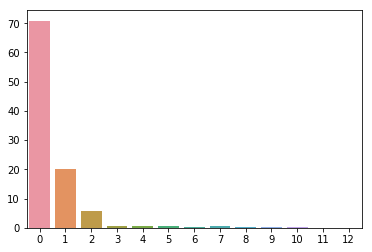

In [54]:
sns.barplot(x.index, x.values/x.sum()*100)

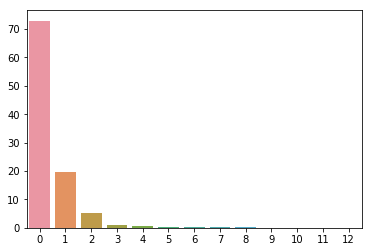

In [55]:
x = pd.Series(three_prime_masking)
sns.barplot(x.index, x.values/x.sum()*100)

In [34]:
three_prime_masking

Counter({0: 5819222,
         1: 1558039,
         2: 410969,
         3: 69086,
         4: 38546,
         5: 23696,
         6: 24760,
         7: 16163,
         8: 11392,
         9: 5605,
         10: 2066,
         11: 2352,
         12: 79})

In [30]:
df = pd.DataFrame(read_length_query_length_map)
df = df/df.sum(axis=0)
df = df.round(2)


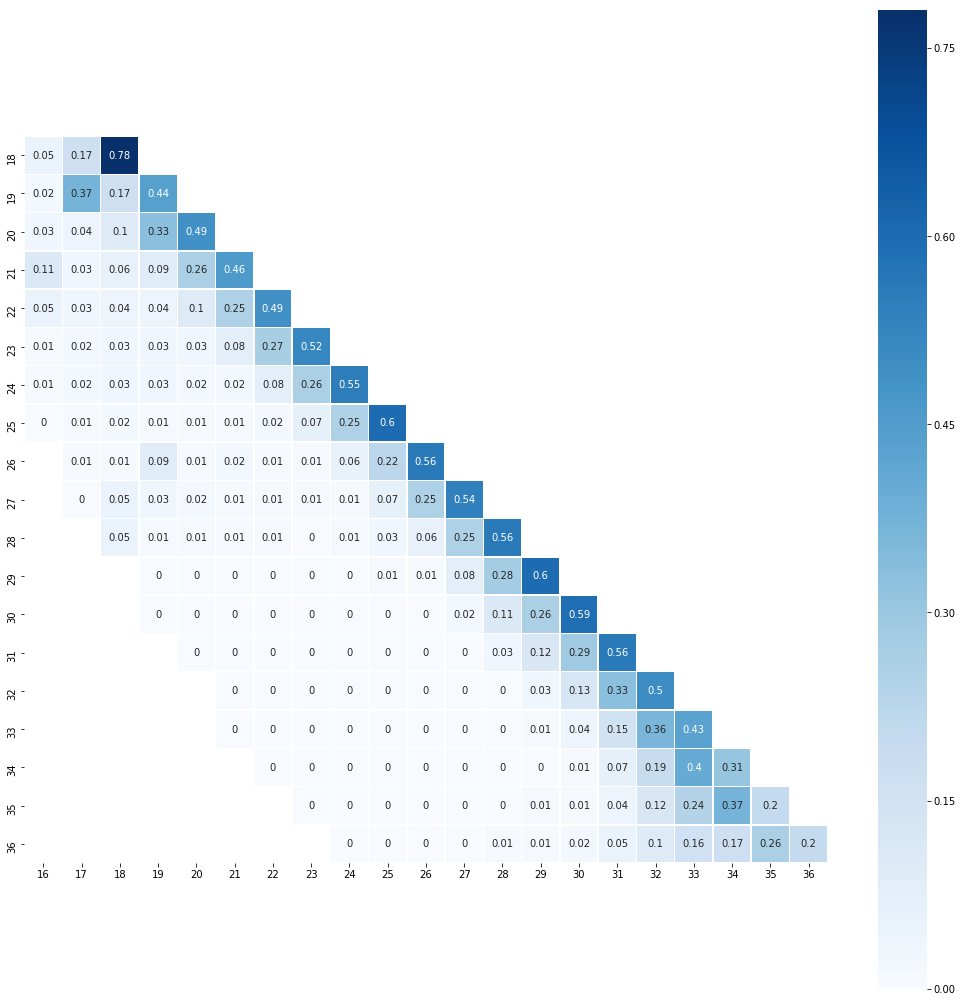

In [31]:
fig = plt.figure(figsize=(18,18))
df = df.round(2)
sns.heatmap(df.T, square=True, linewidths=.5, annot=True,  cmap='Blues')

# Are certain genes associated with certain density of ribosomes


In [ ]:
from riboraptor.hdf_parser import HDFParser

hdf = HDFParser('/staging/as/skchoudh/re-ribo-analysis/hg38/SRP017942/hdf/')